### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "tunescan_flatvh_75_300_1500"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  normalized amplitude in xy-plane  \
beam  qx     qy                                                            
lhcb1 62.305 60.309      base_collider                             3.793   
             60.310      base_collider                             3.862   
             60.311      base_collider                             3.862   
             60.312      base_collider                             4.138   
             60.313      base_collider                             3.241   
...                                ...                               ...   
      62.323 60.328      base_collider                             4.690   
             60.329      base_collider                             4.207   
      62.324 60.328      base_collider                             4.828   
             60.329      base_collider                             4.345   
      62.325 60.329      base_collider                             4.483   

                         qx      qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy                                                           
lhcb1 62.305 60.309  62.305  60.309  15.0  15.0         NaN         NaN   
             60.310  62.305  60.310  15.0  15.0         NaN         NaN   
             60.311  62.305  60.311  15.0  15.0         NaN         NaN   
             60.312  62.305  60.312  15.0  15.0         NaN         NaN   
             60.313  62.305  60.313  15.0  15.0         NaN         NaN   
...                     ...     ...   ...   ...         ...         ...   
      62.323 60.328  62.323  60.328  15.0  15.0         NaN         NaN   
             60.329  62.323  60.329  15.0  15.0         NaN         NaN   
      62.324 60.328  62.324  60.328  15.0  15.0         NaN         NaN   
             60.329  62.324  60.329  15.0  15.0         NaN         NaN   
      62.325 60.329  62.325  60.329  15.0  15.0         NaN         NaN   

                     i_oct_b1  i_oct_b2  num_particles_per_bunch  \
beam  qx     qy                                                    
lhcb1 62.305 60.309      60.0      60.0             1.400000e+11   
             60.310      60.0      60.0             1.400000e+11   
             60.311      60.0      60.0             1.400000e+11   
             60.312      60.0      60.0             1.400000e+11   
             60.313      60.0      60.0             1.400000e+11   
...                       ...       ...                      ...   
      62.323 60.328      60.0      60.0             1.400000e+11   
             60.329      60.0      60.0             1.400000e+11   
      62.324 60.328      60.0      60.0             1.400000e+11   
             60.329      60.0      60.0             1.400000e+11   
      62.325 60.329      60.0      60.0             1.400000e+11   

                     crossing_angle  
beam  qx     qy                      
lhcb1 62.305 60.309           250.0  
             60.310           250.0  
             60.311           250.0  
             60.312           250.0  
             60.313           250.0  
...                             ...  
      62.323 60.328           250.0  
             60.329           250.0  
      62.324 60.328           250.0  
             60.329           250.0  
      62.325 60.329           250.0  

[231 rows x 12 columns]

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,3.793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,3.862,3.931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,3.862,4.000,4.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,4.138,3.793,3.793,3.931,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,3.241,3.724,3.793,3.931,3.862,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,4.000,3.655,4.000,4.000,3.586,3.793,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,3.793,3.655,3.586,3.862,3.862,3.862,4.414,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,3.793,3.793,3.862,4.000,3.379,3.931,4.069,4.966,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,3.862,3.655,3.931,3.655,3.793,3.862,3.862,5.793,5.655,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Replace NaNs above the upper diagonal with 8
for qx in df_to_plot.columns:
    for qy in df_to_plot.index:
        if qy >= qx - 2 + 0.004:
            if pd.isna(df_to_plot.loc[qy, qx]):
                df_to_plot.loc[qy, qx] = 8

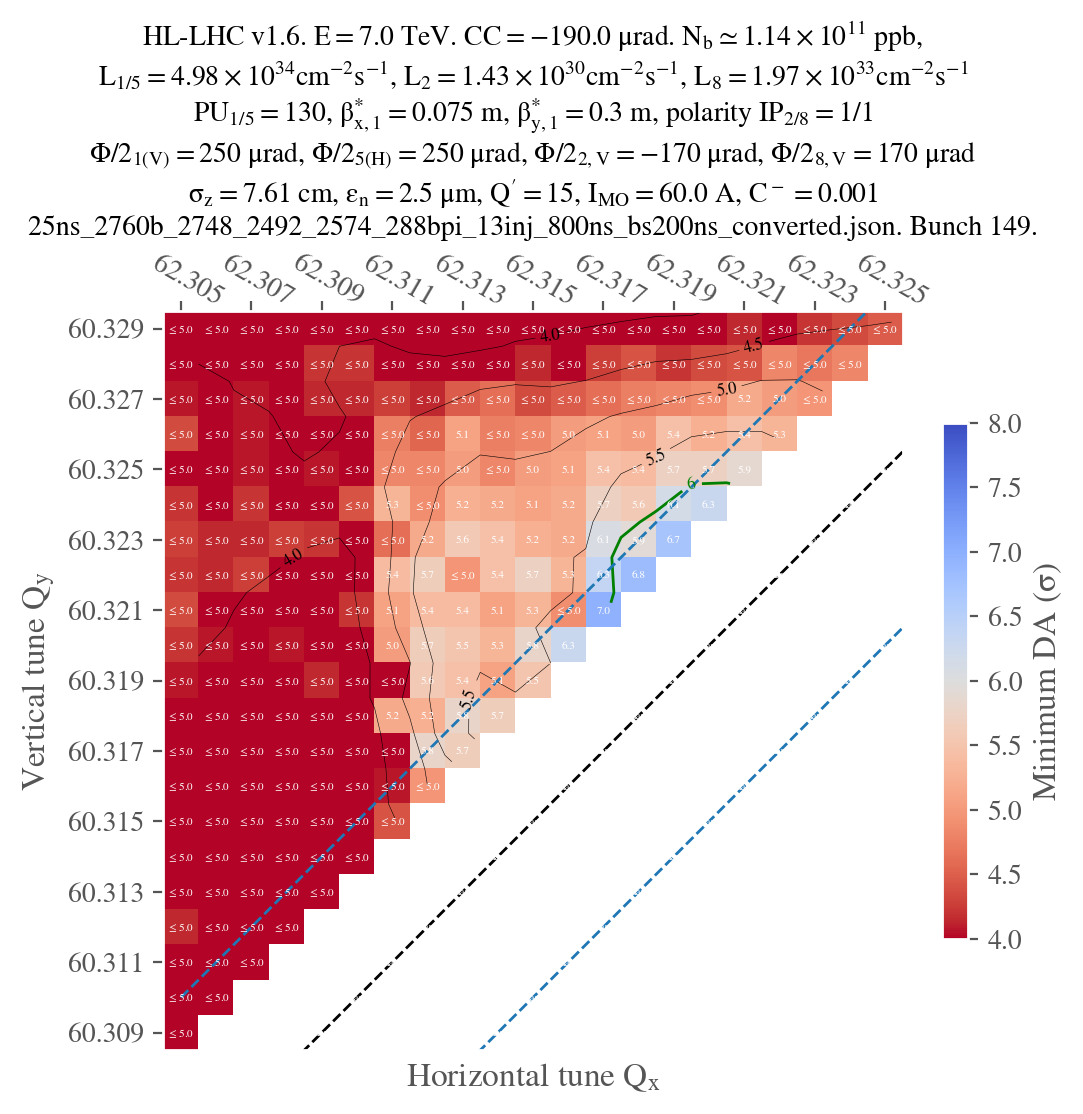

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.075,
    bety=0.300,
    Nb=True,
    green_contour=6.,
    extended_diagonal=False,
    vmin=4.,
    vmax=8.0,
    CC = True,
)
# ! Verified
